    0|W:    2.4520|b:     0.376|cost: 45.660004


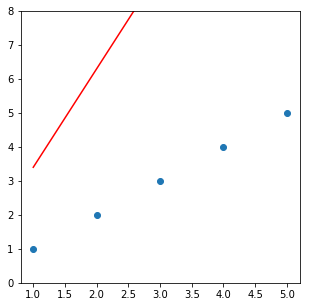

   10|W:    1.1036|b:  0.003398|cost:  0.206336


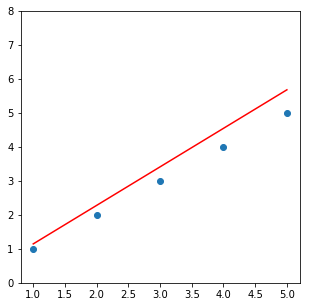

   20|W:    1.0128|b:  -0.02091|cost:  0.001026


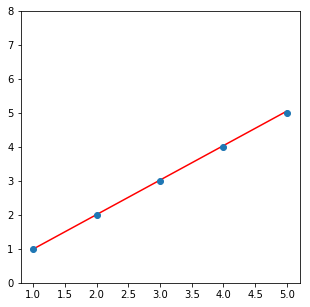

   30|W:    1.0065|b:  -0.02184|cost:  0.000093


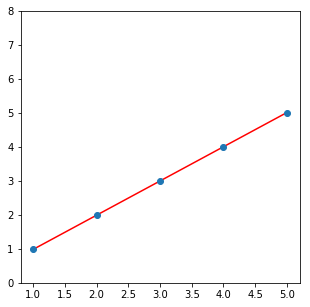

   40|W:    1.0059|b:  -0.02123|cost:  0.000083


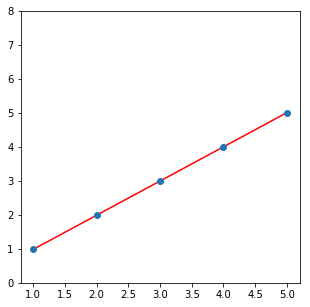

   50|W:    1.0057|b:  -0.02053|cost:  0.000077


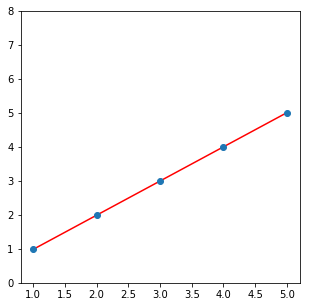

   60|W:    1.0055|b:  -0.01984|cost:  0.000072


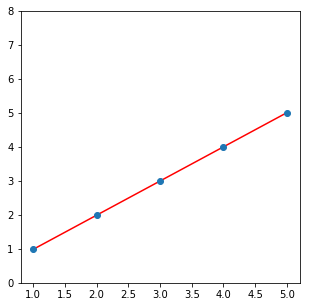

   70|W:    1.0053|b:  -0.01918|cost:  0.000067


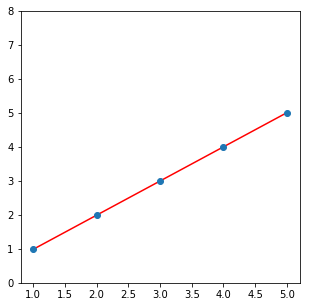

   80|W:    1.0051|b:  -0.01854|cost:  0.000063


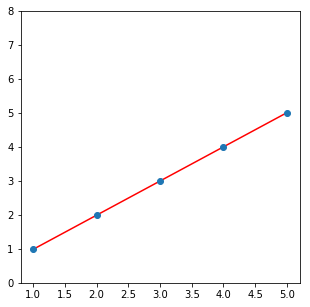

   90|W:    1.0050|b:  -0.01793|cost:  0.000059


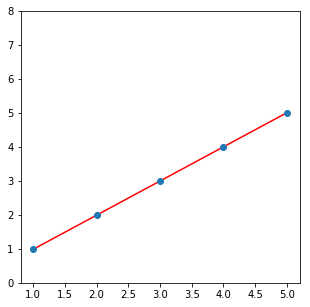

  100|W:    1.0048|b:  -0.01733|cost:  0.000055


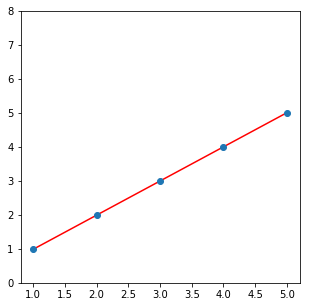

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.enable_eager_execution()

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]
# x_data: input, y_data: output

W = tf.Variable(2.9)
b = tf.Variable(0.5)
# normally it`s random in initial time

learning_rate = 0.01
# learnig rate: how much will this gradient value reflect
# normally use small value
# there will be quite big changes when learning rate is big also reverse situation changes seem less

for i in range(100+1):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b # hypothesis equation
        cost = tf.reduce_mean(tf.square(hypothesis - y_data)) # cost function
    # tf.reduce_mean():implement mean with reducing dimension
    # tf.square(): square the factor
    
    # Gradient descent: minimize cost with down the slope
    # GradientTape(): use with 'with' it record change of variables in 'with' block by tape
        
    W_grad, b_grad = tape.gradient(cost, [W, b])
    
    # tape.gradient(): after recording tape, call the gradient() method to calculate the slope and bias value by tuples
    
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    # update W, b
    # A.assign_sub(B): A -= B
    
    if i % 10 == 0:
        print("{:5}|W:{:10.4f}|b:{:10.4}|cost:{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
        # check the values when i is multiples of 10
        # .numpy(): translate to array
        
        plt.figure(figsize=(5, 5))
        plt.plot(x_data, hypothesis.numpy(), 'r-')
        plt.plot(x_data, y_data, 'o')
        plt.ylim(0, 8)
        plt.show()

Result review
i: Keep increasing 1 to 100
W: closing to 1.0
b: closing to 0.0
cost: Keep decreasing to 0

Goal
W: 1.0
b: 0.0
cost: 0.0

This means our model predict real value pretty well and we define W(weight) and b(bias).

In [5]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)


Predicting by our model is quite well!!